In [20]:
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
def print_df_size(name, df):
	print(name, f"- shape: {df.shape} --> {df.shape[0]} rows and {df.shape[1]} columns")

In [8]:
movie_headers = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries", "Movie genres"]
movie_headers = [header.lower().replace(' ', '_') for header in movie_headers]

In [9]:
movies_df = pd.read_csv("./data/MovieSummaries/movie.metadata.tsv", sep="\t", header=None, names=movie_headers)
movies_df.head()

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [10]:
tmdb_movies_df = pd.read_csv("./data/TMDBMovies/TMDB_movie_dataset_v11.csv")
tmdb_movies_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [11]:
tmdb_with_ids_df = tmdb_movies_df.dropna(subset=['imdb_id'])
query_df = pd.read_csv("./data/Converter/query.csv", sep=',', header=0)
tmdb_with_ids_df = tmdb_with_ids_df.merge(query_df, how='inner', on='imdb_id')
full_merged = pd.merge(movies_df, tmdb_with_ids_df, left_on='freebase_movie_id', right_on='freebase_id', how='inner')

In [12]:
full_merged.head()

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,id,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,freebase_id
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",10016,...,"In 2176, a Martian police unit is sent to pick...",14.189,/i2zztssCIbahGES1fdfWFmDXian.jpg,Terror is the same on any planet.,"Action, Horror, Science Fiction","Animationwerks, Screen Gems, Storm King Produc...",United States of America,English,"future, planet mars, anti hero, possession, ho...",/m/03vyhn
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",784579,...,Dramatization of the story behind the murder o...,0.600,NaN,NaN,"Drama, Crime",NaN,United States of America,English,"colorado, jonbenet",/m/08yl5d
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",396302,...,A stolen bicycle case ends with drunken detect...,0.898,/rtFEOQQ0LVDv7y2bCgVVg3wWpXK.jpg,A film about murder and love,"Mystery, Crime, Drama","Filmeffekt AS, Norsk Film",Norway,Norwegian,"bicycle, private detective",/m/0crgdbh
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",33592,...,"In a wealthy and isolated desert community, a ...",8.297,/aLFoGmQpknOvcyx4imCP7Fuvoip.jpg,No woman is safe… while he is loose!,"Horror, Thriller",Mrs. White's Productions,United Kingdom,English,"based on novel or book, gas station, psychopat...",/m/0285_cd
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",11192,...,"Eva, an upper-class housewife, frustratedly le...",2.801,/iKeCVR0x8vnRXLtjwjZ7EuVFlo7.jpg,NaN,Drama,Dieter Geissler Filmproduktion,Germany,German,"jealousy, eroticism, gigolo, longing, dominatr...",/m/01mrr1


In [13]:
full_merged['runtime_final'] = full_merged['movie_runtime'].fillna(full_merged['runtime'])
full_merged['release_date_final'] = full_merged['release_date'].fillna(full_merged['movie_release_date'])

full_merged["movie_languages_cleaned"] = full_merged["movie_languages"].apply(lambda x: list(dict(eval(x)).values()))
full_merged["movie_countries_cleaned"] = full_merged["movie_countries"].apply(lambda x: list(dict(eval(x)).values()))
full_merged["movie_genres_cleaned"] = full_merged["movie_genres"].apply(lambda x: list(dict(eval(x)).values()))

In [14]:
columns_to_drop = [
  "wikipedia_movie_id",
  "title", 
 	"movie_box_office_revenue", 
  "id", 
	"status", 
  "adult",
  "backdrop_path", 
  "homepage", 
  "poster_path", 
  "tagline", 
  "movie_runtime",
  "runtime",
	"movie_release_date",
	"release_date",
	"movie_languages",
	"movie_countries",
  "original_title",
	"movie_genres",
]

full_reduced = full_merged.drop(columns=columns_to_drop)

In [15]:
#full_reduced.drop(full_reduced[full_reduced['vote_count'] <= 1].index, inplace = True)
#full_reduced.drop(full_reduced[full_reduced['revenue'] == 0].index, inplace = True)
#full_reduced = full_reduced[full_reduced['movie_genres_cleaned'].apply(lambda x: x != [])]
count_non_zero = (full_reduced['revenue'] != 0).sum()

print(count_non_zero)
value_counts = full_reduced['movie_genres_cleaned'].value_counts()

print(value_counts)

8962
movie_genres_cleaned
[Drama]                                                                                            5480
[Comedy]                                                                                           1752
[Documentary]                                                                                      1162
[Comedy film]                                                                                      1131
[]                                                                                                  997
                                                                                                   ... 
[Silent film, Indie, War film, Epic, Black-and-white, Drama, Biopic [feature], Historical Epic]       1
[Sports, Drama, Family Drama, Comedy-drama, Comedy]                                                   1
[Crime Fiction, Thriller, Japanese Movies, World cinema, Action/Adventure]                            1
[Fantasy, Action, Drama, Adventure]   

In [16]:
full_reduced

,freebase_movie_id,movie_name,vote_average,vote_count,revenue,budget,imdb_id,original_language,overview,popularity,...,production_companies,production_countries,spoken_languages,keywords,freebase_id,runtime_final,release_date_final,movie_languages_cleaned,movie_countries_cleaned,movie_genres_cleaned
0,/m/03vyhn,Ghosts of Mars,5.127,977,14010832,28000000,tt0228333,en,"In 2176, a Martian police unit is sent to pick...",14.189,...,"Animationwerks, Screen Gems, Storm King Produc...",United States of America,English,"future, planet mars, anti hero, possession, ho...",/m/03vyhn,98.0,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0,0,tt0245916,en,Dramatization of the story behind the murder o...,0.600,...,NaN,United States of America,English,"colorado, jonbenet",/m/08yl5d,95.0,2000-02-16,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,/m/0crgdbh,Brun bitter,0.000,0,0,0,tt0094806,no,A stolen bicycle case ends with drunken detect...,0.898,...,"Filmeffekt AS, Norsk Film",Norway,Norwegian,"bicycle, private detective",/m/0crgdbh,83.0,1988-11-17,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,/m/0285_cd,White Of The Eye,5.742,64,0,0,tt0094320,en,"In a wealthy and isolated desert community, a ...",8.297,...,Mrs. White's Productions,United Kingdom,English,"based on novel or book, gas station, psychopat...",/m/0285_cd,110.0,1987-06-19,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,/m/01mrr1,A Woman in Flames,5.300,13,0,0,tt0083949,de,"Eva, an upper-class housewife, frustratedly le...",2.801,...,Dieter Geissler Filmproduktion,Germany,German,"jealousy, eroticism, gigolo, longing, dominatr...",/m/01mrr1,106.0,1983-05-11,[German Language],[Germany],[Drama]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,0,0,tt1816585,en,A story that imagines how these real-world phe...,2.728,...,DSP,United States of America,English,"mermaid, mockumentary, fake documentary",/m/0j7hxnt,120.0,2011-03-19,[English Language],[United States of America],[Drama]
68429,/m/0g4pl34,Knuckle,5.700,28,0,0,tt1606259,en,An epic 12-year journey into the brutal and se...,1.656,...,"Fís Éireann/Screen Ireland, Rise Films, BBC St...",Ireland,English,"sports, bare knuckle boxing, fistfight",/m/0g4pl34,96.0,2011-12-09,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]"
68430,/m/02pygw1,Another Nice Mess,0.000,0,0,0,tt0362411,en,Nixon and Agnew played as Laurel and Hardy.,2.087,...,Smo-Bro International Productions,United States of America,English,NaN,/m/02pygw1,66.0,1972-08-23,[English Language],[United States of America],"[Satire, Comedy]"
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0,0,tt0113726,ja,Plot Summary: A.D. 2089 - 80 years have passed...,0.600,...,Anime International Company,Japan,Japanese,"fighter jet, mecha, anime, macross",/m/03pcrp,150.0,1992-05-21,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ..."


In [17]:
full_reduced.isna().sum()

freebase_movie_id              0
movie_name                     0
vote_average                   0
vote_count                     0
revenue                        0
budget                         0
imdb_id                        0
original_language              0
overview                    1956
popularity                     0
genres                      4287
production_companies       14173
production_countries        7344
spoken_languages            6440
keywords                   26882
freebase_id                    0
runtime_final                  0
release_date_final            64
movie_languages_cleaned        0
movie_countries_cleaned        0
movie_genres_cleaned           0
dtype: int64

In [18]:
full_reduced.to_pickle("./data/full_cleaned_movies_df.pkl")

In [19]:
added_movies = pd.read_json('./data/MovieLens/raw/metadata_updated.json', lines=True)

In [20]:
added_movies["imdbId"] = added_movies["imdbId"].astype(str)
print(type(added_movies["imdbId"].iloc[0]))
added_movies.head(10)

<class 'str'>


,title,directedBy,starring,avgRating,imdbId,item_id
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709,1
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605,113497,2
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",3.17146,113228,3
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",2.86824,114885,4
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",3.07620,113041,5
5,Heat (1995),Michael Mann,"Robert De Niro, Al Pacino, Val Kilmer, Jon Voi...",3.85549,113277,6
6,Sabrina (1995),Sydney Pollack,"Harrison Ford, Greg Kinnear, Nancy Marchand, J...",3.37244,114319,7
7,Tom and Huck (1995),Peter Hewitt,"Jonathan Taylor Thomas, Brad Renfro, Eric Schw...",3.11678,112302,8
8,Sudden Death (1995),Peter Hyams,"Raymond J. Barry, Powers Boothe, Jean-Claude V...",3.00242,114576,9
9,GoldenEye (1995),Martin Campbell,"Pierce Brosnan, Sean Bean, Famke Janssen, Izab...",3.43340,113189,10


In [21]:
converter = pd.read_csv('./data/Converter/query.csv')
print_df_size("converter", converter)

converter - shape: (409064, 2) --> 409064 rows and 2 columns


In [22]:
converter["imdb_id"] = converter["imdb_id"].str[3:]
converter.head(10)

,imdb_id,freebase_id
0,010930,/m/0282x
1,124133,/m/09b6zr
2,684496,/m/014d3
3,061667,/m/01rgr
4,675434,/m/0hgqwpj
5,949918,/m/0m2l9
6,180134,/m/0fyh4
7,001789,/m/0hy8
8,686817,/m/05qmj
9,000658,/m/0h0wc


In [23]:
merged_data = pd.merge(full_reduced, converter, left_on="freebase_movie_id", right_on="freebase_id", how='left')

full_reduced['imdb_id'] = merged_data["imdb_id_y"]

In [24]:
final_data = pd.merge(full_reduced, added_movies, left_on='imdb_id', right_on="imdbId", how='left')
final_data.head(20)

,freebase_movie_id,movie_name,vote_average,vote_count,revenue,budget,imdb_id,original_language,overview,popularity,...,release_date_final,movie_languages_cleaned,movie_countries_cleaned,movie_genres_cleaned,title,directedBy,starring,avgRating,imdbId,item_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14010832,28000000,228333,en,"In 2176, a Martian police unit is sent to pick...",14.189,...,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Ghosts of Mars (2001),John Carpenter,"Natasha Henstridge, Ice Cube, Jason Statham, C...",2.35723,228333,4735.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0,0,245916,en,Dramatization of the story behind the murder o...,0.600,...,2000-02-16,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,NaN,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0,0,094806,no,A stolen bicycle case ends with drunken detect...,0.898,...,1988-11-17,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN,NaN,NaN,NaN,NaN,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,0,0,094320,en,"In a wealthy and isolated desert community, a ...",8.297,...,1987-06-19,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",NaN,NaN,NaN,NaN,NaN,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,0,0,083949,de,"Eva, an upper-class housewife, frustratedly le...",2.801,...,1983-05-11,[German Language],[Germany],[Drama],NaN,NaN,NaN,NaN,NaN,NaN
5,/m/03cfc81,The Gangsters,6.000,1,0,0,002894,en,An amusing burlesque of gang fighters. The pol...,0.600,...,1913-05-29,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi...",NaN,NaN,NaN,NaN,NaN,NaN
6,/m/02qc0j7,Alexander's Ragtime Band,6.600,23,4000000,2000000,029852,en,"Classical violinist, Roger Grant disappoints h...",2.522,...,1938-05-24,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",NaN,NaN,NaN,NaN,NaN,NaN
7,/m/06_y2j7,Contigo y aquí,0.000,0,0,0,200545,es,NaN,1.090,...,1974-09-04,[Spanish Language],[Argentina],"[Musical, Drama, Comedy]",NaN,NaN,NaN,NaN,NaN,NaN
8,/m/075f66,City of the Dead,6.479,131,0,0,053719,en,A young college student arrives in a sleepy Ma...,11.321,...,1960-09-09,[English Language],[United Kingdom],"[Horror, Supernatural]",NaN,NaN,NaN,NaN,NaN,NaN
9,/m/017n1p,Sarah and Son,5.000,7,0,0,021335,en,"A ne'er-do-well husband, after years of abusin...",2.018,...,1930-03-14,[English Language],[United States of America],"[Drama, Black-and-white]",NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
filtered_final_data = final_data.dropna(subset=['imdbId'])
# Drop the rows with empty country lists as well as languages in order to perform analysis
#filtered_final_data = filtered_final_data.dropna(subset=['country_origin'])
#filtered_final_data = filtered_final_data.dropna(subset=['language'])

filtered_final_data

,freebase_movie_id,movie_name,vote_average,vote_count,revenue,budget,imdb_id,original_language,overview,popularity,...,release_date_final,movie_languages_cleaned,movie_countries_cleaned,movie_genres_cleaned,title,directedBy,starring,avgRating,imdbId,item_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14010832,28000000,228333,en,"In 2176, a Martian police unit is sent to pick...",14.189,...,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Ghosts of Mars (2001),John Carpenter,"Natasha Henstridge, Ice Cube, Jason Statham, C...",2.35723,228333,4735.0
11,/m/0gffwj,Little city,3.833,6,0,0,119548,en,Best friends Adam and Kevin have a lot in comm...,1.556,...,1997-04-04,[English Language],[United States of America],"[Romantic comedy, Ensemble Film, Comedy-drama,...",Little City (1998),Roberto Benabib,"Jon Bon Jovi, Josh Charles, Penelope Ann Mille...",3.00000,119548,1782.0
13,/m/04cqrs4,Aaah Belinda,7.444,27,0,0,278891,tr,Serap is a successful theater actress. Althoug...,3.315,...,1986-04-02,[Turkish Language],[Turkey],[Comedy],Aaahh Belinda (1986),Atıf Yılmaz,"Müjde Ar,Yılmaz Zafer,Macit Koper,Fatoş Sezer,...",4.50000,278891,236345.0
20,/m/02wjqm,New Rose Hotel,5.270,98,21521,0,133122,en,A corporate raider and his henchman use a chan...,10.272,...,1999-03-19,[English Language],[United States of America],"[Thriller, Science Fiction, Future noir, Indie...",New Rose Hotel (1998),Abel Ferrara,"Willem Dafoe, Christopher Walken, Asia Argento...",2.47790,133122,2892.0
21,/m/05p45cv,White on Rice,5.800,7,0,0,892904,en,"40-year-old Jimmy is growing up, or at least h...",1.698,...,2009-05-31,[],[United States of America],"[Romantic comedy, Romance Film, Comedy, Indie]",White on Rice (2009),Dave Boyle,"Hiroshi Watanabe, Nae, Mio Takada",2.00000,892904,90777.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68409,/m/0gh7dwg,Pestalozzi's Mountain,6.300,3,0,0,470000,de,"In the 1770s, Swiss farmer Johann Heinrich Pes...",2.245,...,1989-03-17,[German Language],"[Switzerland, Italy, West Germany, German Demo...","[Biography, Drama, War film]",Wicked Little Things (2006),J.S. Cardone,"Lori Heuring, Scout Taylor-Compton, Chloë Grac...",3.13115,470000,83923.0
68412,/m/0kvgqb,Spaced Invaders,4.879,66,15369573,3000000,114474,en,A crew of Martians overhears a radio broadcast...,7.374,...,1990-04-27,[English Language],[United States of America],"[Alien Film, Science Fiction, Family Film, Com...",Small Faces (1996),Gillies MacKinnon,"Iain Robertson, Joseph McFadden, Steven Duffy,...",3.32407,114474,865.0
68414,/m/0b6m67n,The Flying Serpent,4.643,14,0,0,208101,en,"A demented archaeologist discovers a living, b...",2.821,...,1946-02-01,[],[United States of America],"[Thriller, B-movie, Horror]",Don't Look Under the Bed (1999),Kenneth Johnson,"Erin Chambers,Ty Hodges,Robin Riker,Steve Vale...",3.05000,208101,135272.0
68422,/m/0gkz70w,The Luck of the Navy,0.000,0,0,0,889222,en,A spy has his son steal an Admiral's submarine...,0.600,...,1927-11-22,[],[United Kingdom],"[Thriller, Silent film, Action, Drama, Comedy ...",Si le vent soulève les sables (2007),Marion Hänsel,"Isaka Sawadogo,Carole Karemera,Asma Nouman Ade...",3.66667,889222,134505.0


In [44]:
filtered_final_data.to_pickle("./data/filtered_final_data.pkl")

In [26]:
"""
reviews_df = pd.read_json('./data/MovieLens/raw/reviews.json', lines=True)
reviews_df.head(10)
"""

"\nreviews_df = pd.read_json('./data/MovieLens/raw/reviews.json', lines=True)\nreviews_df.head(10)\n"

In [16]:
# For faster loading and saving, we will save the dataframe as a pickle file
reviews_df = pd.read_pickle('./data/reviews.pkl')
reviews_df.head(10)

,item_id,txt
0,172063,"one-shot record of a belly dancer; ""Carmencita..."
1,95541,Banging Away..; Thomas Edison and William K.L....
2,7065,unbelievable; I cannot understand how anyone c...
3,3739,I'm still starry-eyed from it; I saw this last...
4,1562,Failed on every Front; Joel Schumacher who did...
5,8977,"Poor Casting, Poor script Poor direction.; I h..."
6,2174,An Accomplished Tim Burton Movie; A Great Idea...
7,8947,"Very good; I saw ""The Grudge"" yesterday, and w..."
8,143027,This movie was stupid.; This movie was totally...
9,143027,. . . is a great movie.; Amazing! Finally Disn...


In [17]:
reviews_df[reviews_df["item_id"] == 4735]

,item_id,txt
14888,4735,Pretty Good; On the planet Mars in the not-too...
16525,4735,Quatermass influence; I have not read all the ...
19894,4735,Dreary stuff; GHOSTS OF MARS Aspect ratio: 2.3...
27724,4735,Please stop watching Carpenter if you hate his...
27873,4735,Entertaining Time Killer But Nothing More Then...
...,...,...
2593038,4735,hmm that junk mail look interesting...; I actu...
2597984,4735,Average and noisy film but with poor dialogue ...
2619552,4735,"Here's a mirror. Have a good, hard long look a..."
2622820,4735,"It's SUCH a crappy movie, but watch it for fun..."


In [18]:
reviews_with_titles = pd.merge(reviews_df, filtered_final_data[['item_id', 'title']], on='item_id', how='left')
reviews_with_titles.dropna(subset=['title'], inplace=True)
reviews_with_titles

,item_id,txt,title
4,1562,Failed on every Front; Joel Schumacher who did...,Batman & Robin (1997)
5,1562,Failed on every Front; Joel Schumacher who did...,Batman & Robin (1997)
6,8977,"Poor Casting, Poor script Poor direction.; I h...",Alexander (2004)
8,8947,"Very good; I saw ""The Grudge"" yesterday, and w...","Grudge, The (2004)"
9,143027,This movie was stupid.; This movie was totally...,Now You See It... (2005)
...,...,...,...
2640864,520,"Aims low, with hilarious results; ROBIN HOOD: ...",Robin Hood: Men in Tights (1993)
2640865,8640,Worst epic of 2004; I usually love big epics i...,King Arthur (2004)
2640866,1377,superb Second Movie; I was glad to see that Ti...,Batman Returns (1992)
2640867,26746,Seagal takes out the garbage; This is hard cor...,Out for Justice (1991)


In [22]:
merged_reviews = pd.merge(filtered_final_data, reviews_df, left_on='item_id', right_on='item_id', how='inner')
print_df_size("merged reviews", merged_reviews)
merged_reviews.head(10)
merged_reviews.isna().sum()


merged reviews - shape: (1292221, 28) --> 1292221 rows and 28 columns


freebase_movie_id               0
movie_name                      0
vote_average                    0
vote_count                      0
revenue                         0
budget                          0
imdb_id                         0
original_language               0
overview                    44354
popularity                      0
genres                          0
production_companies       275946
production_countries       148600
spoken_languages           133384
keywords                   507372
freebase_id                     0
runtime_final                   0
release_date_final            422
movie_languages_cleaned         0
movie_countries_cleaned         0
movie_genres_cleaned            0
title                           0
directedBy                      0
starring                        0
avgRating                       0
imdbId                          0
item_id                         0
txt                             0
dtype: int64

In [23]:
#To load it faster for our work
merged_reviews.to_pickle('./data/merged_reviews.pkl')

In [24]:
merged_reviews

,freebase_movie_id,movie_name,vote_average,vote_count,revenue,budget,imdb_id,original_language,overview,popularity,...,movie_languages_cleaned,movie_countries_cleaned,movie_genres_cleaned,title,directedBy,starring,avgRating,imdbId,item_id,txt
0,/m/03vyhn,Ghosts of Mars,5.127,977,14010832,28000000,228333,en,"In 2176, a Martian police unit is sent to pick...",14.189,...,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Ghosts of Mars (2001),John Carpenter,"Natasha Henstridge, Ice Cube, Jason Statham, C...",2.35723,228333,4735.0,Pretty Good; On the planet Mars in the not-too...
1,/m/03vyhn,Ghosts of Mars,5.127,977,14010832,28000000,228333,en,"In 2176, a Martian police unit is sent to pick...",14.189,...,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Ghosts of Mars (2001),John Carpenter,"Natasha Henstridge, Ice Cube, Jason Statham, C...",2.35723,228333,4735.0,Quatermass influence; I have not read all the ...
2,/m/03vyhn,Ghosts of Mars,5.127,977,14010832,28000000,228333,en,"In 2176, a Martian police unit is sent to pick...",14.189,...,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Ghosts of Mars (2001),John Carpenter,"Natasha Henstridge, Ice Cube, Jason Statham, C...",2.35723,228333,4735.0,Dreary stuff; GHOSTS OF MARS Aspect ratio: 2.3...
3,/m/03vyhn,Ghosts of Mars,5.127,977,14010832,28000000,228333,en,"In 2176, a Martian police unit is sent to pick...",14.189,...,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Ghosts of Mars (2001),John Carpenter,"Natasha Henstridge, Ice Cube, Jason Statham, C...",2.35723,228333,4735.0,Please stop watching Carpenter if you hate his...
4,/m/03vyhn,Ghosts of Mars,5.127,977,14010832,28000000,228333,en,"In 2176, a Martian police unit is sent to pick...",14.189,...,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Ghosts of Mars (2001),John Carpenter,"Natasha Henstridge, Ice Cube, Jason Statham, C...",2.35723,228333,4735.0,Entertaining Time Killer But Nothing More Then...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292216,/m/0gkz70w,The Luck of the Navy,0.000,0,0,0,889222,en,A spy has his son steal an Admiral's submarine...,0.600,...,[],[United Kingdom],"[Thriller, Silent film, Action, Drama, Comedy ...",Si le vent soulève les sables (2007),Marion Hänsel,"Isaka Sawadogo,Carole Karemera,Asma Nouman Ade...",3.66667,889222,134505.0,Pluses and minuses (see below); POSITIVE REVIE...
1292217,/m/0gkz70w,The Luck of the Navy,0.000,0,0,0,889222,en,A spy has his son steal an Admiral's submarine...,0.600,...,[],[United Kingdom],"[Thriller, Silent film, Action, Drama, Comedy ...",Si le vent soulève les sables (2007),Marion Hänsel,"Isaka Sawadogo,Carole Karemera,Asma Nouman Ade...",3.66667,889222,134505.0,Savage and heartbreaking; This heartbreaking f...
1292218,/m/0gkz70w,The Luck of the Navy,0.000,0,0,0,889222,en,A spy has his son steal an Admiral's submarine...,0.600,...,[],[United Kingdom],"[Thriller, Silent film, Action, Drama, Comedy ...",Si le vent soulève les sables (2007),Marion Hänsel,"Isaka Sawadogo,Carole Karemera,Asma Nouman Ade...",3.66667,889222,134505.0,"Minor flaws that do not matter; Well, spoilers..."
1292219,/m/0gkz70w,The Luck of the Navy,0.000,0,0,0,889222,en,A spy has his son steal an Admiral's submarine...,0.600,...,[],[United Kingdom],"[Thriller, Silent film, Action, Drama, Comedy ...",Si le vent soulève les sables (2007),Marion Hänsel,"Isaka Sawadogo,Carole Karemera,Asma Nouman Ade...",3.66667,889222,134505.0,Extraordinary - heartbreaking and beautiful - ...


In [25]:
merged_reviews['review_length'] = merged_reviews['txt'].apply(lambda x: len(x) if isinstance(x, str) else 0)
average_length = merged_reviews['review_length'].mean()
print(f"The average length of the reviews is {average_length:.2f} characters.")

The average length of the reviews is 1379.82 characters.


In [26]:
num_reviews_greater_1024 = merged_reviews[merged_reviews['review_length'] > 1024].shape[0]
total_reviews = merged_reviews.shape[0]
ratio_greater_1024 = num_reviews_greater_1024/total_reviews
print(f"The ratio of reviews greater than 1024 characters is {ratio_greater_1024:.2f}")

The ratio of reviews greater than 1024 characters is 0.50


In [29]:
num_reviews_greater_2000 = merged_reviews[merged_reviews['review_length'] > 2000].shape[0]
total_reviews = merged_reviews.shape[0]
ratio_greater_2000 = num_reviews_greater_2000/total_reviews
print(f"The ratio of reviews greater than 1024 characters is {ratio_greater_2000:.2f}")

The ratio of reviews greater than 1024 characters is 0.19


# Data Exploration

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
filtered_final_data = pd.read_pickle('./data/filtered_final_data.pkl')

In [7]:
# Let's get all the genres of every movie to count the number of movies in each genre
filtered_final_data['genres'] = filtered_final_data['genres'].apply(lambda x: x.replace(' ', '').split(',') if isinstance(x, str) else [])
# put the genres in a list
all_genres = [genre for sublist in filtered_final_data['genres'] for genre in sublist]
print(all_genres)

['Action', 'Horror', 'ScienceFiction', 'Comedy', 'Romance', 'Comedy', 'Fantasy', 'Thriller', 'Drama', 'Mystery', 'ScienceFiction', 'Comedy', 'Romance', 'Crime', 'Drama', 'Romance', 'Thriller', 'Comedy', 'Romance', 'Comedy', 'Music', 'Comedy', 'ScienceFiction', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Documentary', 'Comedy', 'Horror', 'Drama', 'Romance', 'Drama', 'Thriller', 'TVMovie', 'Thriller', 'Action', 'Adventure', 'Romance', 'Documentary', 'TVMovie', 'ScienceFiction', 'Drama', 'History', 'Drama', 'Romance', 'Drama', 'Crime', 'Documentary', 'Comedy', 'Romance', 'Crime', 'Drama', 'Thriller', 'Comedy', 'Horror', 'Music', 'ScienceFiction', 'Adventure', 'Comedy', 'Drama', 'Comedy', 'Horror', 'ScienceFiction', 'ScienceFiction', 'Horror', 'Fantasy', 'Family', 'Drama', 'Comedy', 'History', 'Romance', 'Horror', 'Romance', 'Drama', 'Documentary', 'Action', 'Adventure', 'Drama', 'Family', 'Mystery', 'Horror', 'Action', 'Adventure', 'Crime', 'ScienceFiction'

In [8]:
# compute the number of movies in each genre
genre_counts = pd.Series(all_genres).value_counts()
genre_counts

Drama             6534
Comedy            4333
Romance           2304
Action            1874
Thriller          1678
Crime             1404
Adventure         1129
Horror            1126
Family             896
Documentary        841
Animation          777
ScienceFiction     706
Mystery            686
Fantasy            667
Music              659
TVMovie            575
History            530
War                501
Western            483
Name: count, dtype: int64

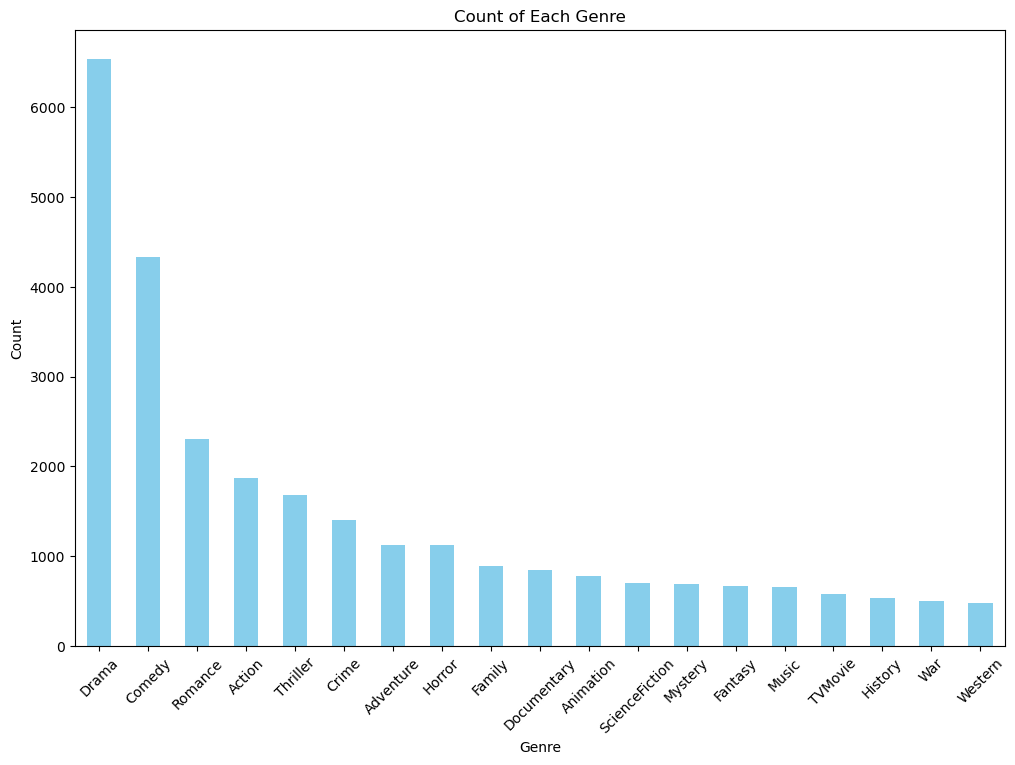

In [14]:
#plotting the number of movies in each genre
plt.figure(figsize=(12, 8))
genre_counts.plot.bar(color='skyblue')
plt.title('Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

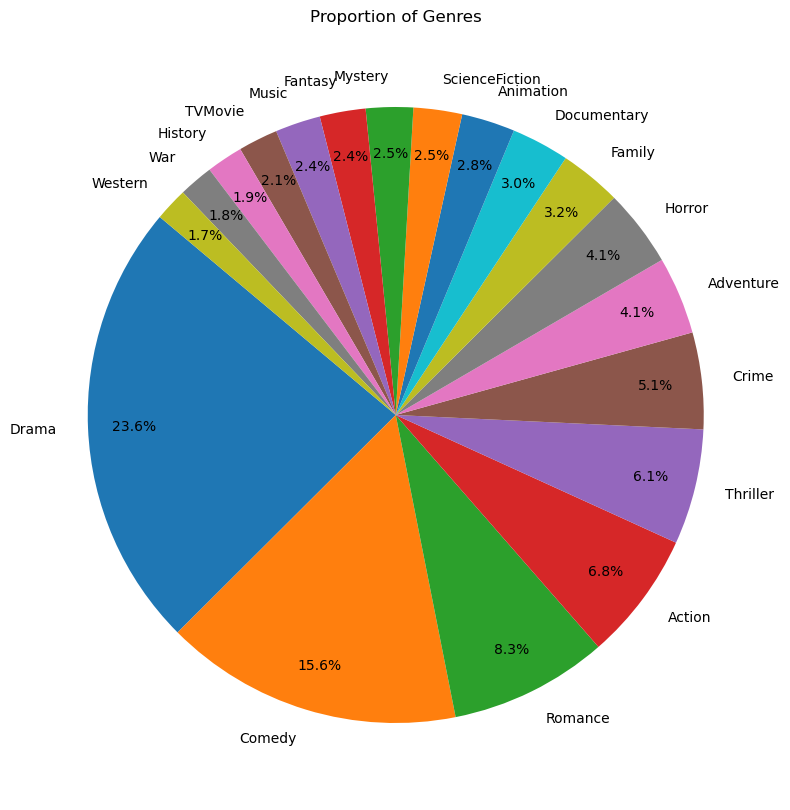

In [13]:
#plotting the distribution of genres in a pie chart
plt.figure(figsize=(12, 10))
genre_counts.plot.pie(autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.title('Proportion of Genres')
plt.ylabel('')
plt.show()